In [29]:
# Processor requirements
# The first two cells must be code cells, inpath and outpath define the scan file location and output location
inpath = "/dls/science/groups/das/ExampleData/hdfmap_tests/i16/1109527.nxs"
outpath = "output.nxs"

In [30]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

from mmg_toolbox import data_file_reader
from mmg_toolbox.plotting.matplotlib import set_plot_defaults


set_plot_defaults()  # set custom matplotlib rcParams

def md(string):
    return display(Markdown(string))

In [39]:
scan = data_file_reader(inpath)

# try:
md(scan.format('# {beamline} Scan: {scan_number:.0f}\n*{filepath}*'))

# Time
start = scan('start_time')
stop = scan('end_time')
duration = stop - start

# Create table
tab = '| field | metadata |\n| --- | --- |\n'
for s in str(scan).split('\n'):
    if '=' in s:
        tab += '| %s |\n' % s.replace('=', '|')

tab += '|**start time** | %s |\n' % start.strftime('%Y-%m-%d %H:%M')
tab += '|**end time** | %s |\n' % stop.strftime('%Y-%m-%d %H:%M')
tab += '|**duration** | %s |\n' % duration

md(tab)
# except:
#     print(scan)

# i16 Scan: 1109527
*/dls/science/groups/das/ExampleData/hdfmap_tests/i16/1109527.nxs*

| field | metadata |
| --- | --- |
| cmd | flyscancn eta_fly 0.005 61 pil3_100k 0.1 0.5 roi1 roi2 |
| axes | /entry/measurement/eta_fly_fly |
| signal | /entry/measurement/roi2_sum |
| detector | pil3_100k |
| shape | (61,) |
| sample | not set |
| energy | 7 eV |
| pol | 0.00 analyser: PG001(8) Merlin |
| temp | 300.00 K |
| hkl | (0.1,-0.019,27) |
| psi | -100.84 Deg, azir|(1.0,0.0,0.0) |
| sx |  -1.16, sy |  -0.78, sz |  13.37 mm |
| eta |  32.25, chi |  88.00, phi |  10.85, mu |   0.00  Deg |
| delta |  65.81, gamma |   0.00  Deg |
| Atten | 30.0 ( 0.568 %) |
| ss | [0.5, 0.5] |
| ds | [10, 10] |
|**start time** | 2025-09-22 11:32 |
|**end time** | 2025-09-22 11:33 |
|**duration** | 0:00:41.514000 |


# Default Plot

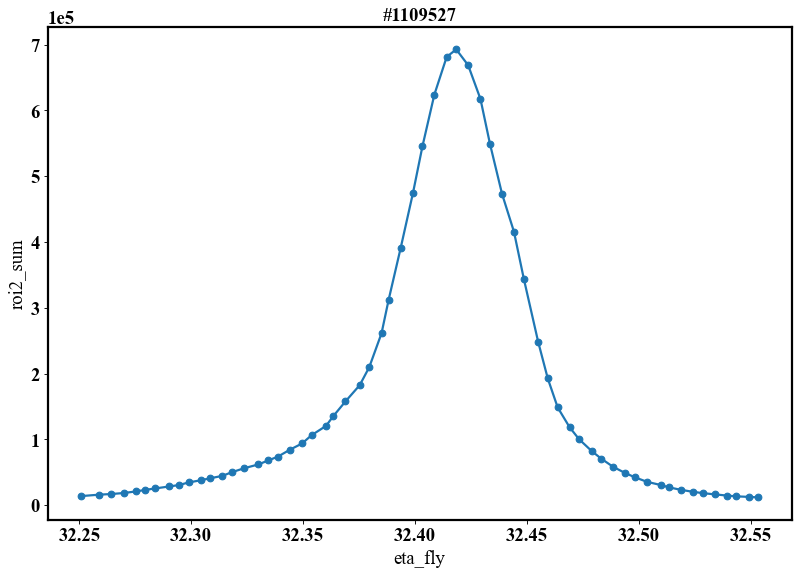

In [40]:
md('# Default Plot')
ax = scan.plot()

# pil3_100k Image

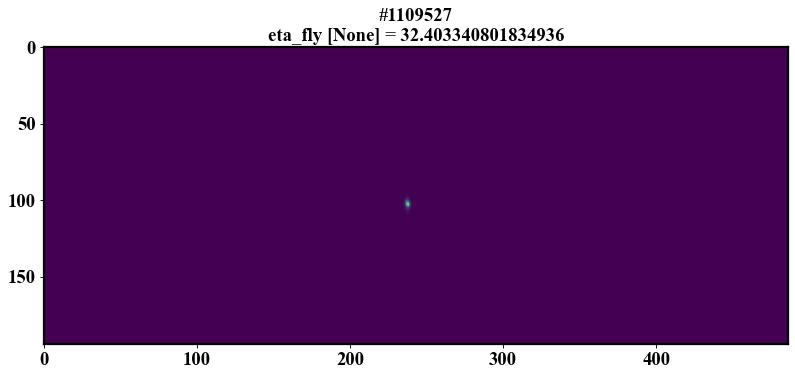

In [42]:
if scan.map.image_data:
    detector = list(scan.map.image_data.keys())[0]
    md(f'# {detector} Image')
    ax = scan.plot.image()
else:
    print('No image file found')

In [47]:
from hdfmap import hdf_tree_string
md('# Nexus Structure')
print(hdf_tree_string(inpath))

# Nexus Structure

########## /dls/science/groups/das/ExampleData/hdfmap_tests/i16/1109527.nxs ##########
-------------- / ---------------------------------------------
 @NX_class = b'NXroot'
 @file_name = b'/dls/i16/data/2025/si40754-2/1109527.nxs'
-------------- entry -----------------------------------------
entry
     @NX_class = b'NXentry'
     @default = b'measurement'
entry/definition                                              :  b'NXmx'
-------------- entry/diamond_scan ----------------------------
entry/diamond_scan
                  @NX_class = b'NXcollection'
entry/diamond_scan/duration                                   :  41514
                           @target = b'/entry/diamond_scan/duration'
                           @units = b'ms'
entry/diamond_scan/end_time                                   :  b'2025-09-22T11:33:10.895'
                           @target = b'/entry/diamond_scan/end_time'
entry/diamond_scan/entry_identifier                           :  1109527
-------------- entry/dia

In [51]:
md('# Scannable Data')
scannables = scan.map.get_scannables(scan.load_hdf(), flatten=True)

table = '| ' + '|'.join(scannables) + ' |\n| ' + ' --- | ' * len(scannables) + '\n'
for n in range(scan.map.scannables_length()):
    table += '| ' + '|'.join(str(array[n]) for array in scannables.values()) + ' |\n'

md(table)

# Scannable Data

| eta_fly|wait_for_injection_scan_start_beamok|wait_for_beam_scan_start_beamok|roi1_max|roi1_sum|roi2_max|roi2_sum|kphi_|kap_|kth_|mu_|delta_|gam_|delta_axis_offset|TimeSec|TimeFromEpoch|ic1monitor|rc|count_time|filepath|pil_max_val|pil_max_x|pil_max_y|pil_total |
|  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- | 
| 32.25088232725994|1.0|1.0|397|7432|397|13690|64.977|-130.136917705|86.37702372884706|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222892.395848063|1758537150.799|862.4038339895034|301.0647888183594|0.1|0.0|397|238|101|97191 |
| 32.25887936115793|1.0|1.0|442|9253|442|15855|64.977|-130.136917705|86.3850207627453|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222893.452512926|1758537151.855|863.1050795397679|301.0517272949219|0.1|0.0|442|238|101|98916 |
| 32.264218344208935|1.0|1.0|511|10337|511|16804|64.977|-130.136917705|86.39035974579609|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222894.202636069|1758537152.606|862.3534613040277|301.043701171875|0.1|0.0|511|237|103|100151 |
| 32.269725123869925|1.0|1.0|497|11533|497|18326|64.977|-130.136917705|86.39586652545707|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222894.749502375|1758537153.152|863.1404929935151|301.0383605957031|0.1|0.0|497|237|103|101542 |
| 32.275111776411926|1.0|1.0|578|13438|578|20680|64.977|-130.136917705|86.4012531779994|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222895.496784997|1758537153.9|862.5949441147328|301.0317077636719|0.1|0.0|578|237|103|104094 |
| 32.27936580183593|1.0|1.0|836|15683|836|23036|64.977|-130.136917705|86.40550720342308|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222896.020886536|1758537154.424|862.4505430375353|301.0244445800781|0.1|0.0|836|237|104|106817 |
| 32.28379715776793|1.0|1.0|1131|17555|1131|25280|64.977|-130.136917705|86.40993855935524|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222896.577188085|1758537154.98|862.4331416914279|301.0165710449219|0.1|0.0|1131|237|104|108343 |
| 32.290209657767925|1.0|1.0|1218|20058|1218|28327|64.977|-130.136917705|86.41635105935518|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222897.249828046|1758537155.653|862.4084130704332|301.011962890625|0.1|0.0|1218|237|104|111866 |
| 32.29446177641193|1.0|1.0|1398|22002|1398|30461|64.977|-130.136917705|86.42060317799921|-1.978200000030128e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222897.793752139|1758537156.197|862.2673704828505|301.0038757324219|0.1|0.0|1398|237|104|113853 |
| 32.29889694590393|1.0|1.0|1753|25832|1753|34461|64.977|-130.136917705|86.4250383474907|-1.978200000030128e-06|57.011741677462254|-6.058400000003017e-05|8.8|222898.311076325|1758537156.714|862.1425077183113|301.0027770996094|0.1|0.0|1753|237|104|117854 |
| 32.30421114081893|1.0|1.0|1690|28699|1690|37712|64.977|-130.136917705|86.43035254240591|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222899.079971261|1758537157.483|862.093967317432|300.9940185546875|0.1|0.0|1690|237|104|121384 |
| 32.30845944590393|1.0|1.0|1736|31356|1736|40788|64.977|-130.136917705|86.43566483054146|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222899.603105952|1758537158.006|862.8675659802096|300.9888610839844|0.1|0.0|1736|237|104|123639 |
| 32.313777454377934|1.0|1.0|1961|34689|1961|44316|64.977|-130.136917705|86.43991885596515|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222900.150802034|1758537158.554|862.9133591188807|300.98443603515625|0.1|0.0|1961|237|105|127537 |
| 32.31827364081894|1.0|1.0|2206|40015|2206|50125|64.977|-130.136917705|86.44441504240578|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222900.701567076|1758537159.104|862.3427764712751|300.979248046875|0.1|0.0|2206|237|105|133197 |
| 32.32360499675092|1.0|1.0|2268|45427|2268|56003|64.977|-130.136917705|86.4508141949481|-1.978200000030128e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222901.451242679|1758537159.854|862.9139694145383|300.9737548828125|0.1|0.0|2268|237|105|139629 |
| 32.329998428953935|1.0|1.0|2795|50818|2795|61814|64.977|-130.136917705|86.45613983054128|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222902.201479363|1758537160.604|862.023750705595|300.9652099609375|0.1|0.0|2795|237|104|145555 |
| 32.33443359844593|1.0|1.0|2812|56349|2812|67905|64.977|-130.136917705|86.46057500003276|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222902.669590855|1758537161.073|862.1748682961472|300.96258544921875|0.1|0.0|2812|237|103|151473 |
| 32.33870669166593|1.0|1.0|3205|61756|3205|73654|64.977|-130.136917705|86.46484809325305|-1.978200000030128e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222903.290874949|1758537161.694|862.4832087632001|300.95654296875|0.1|0.0|3205|237|103|157338 |
| 32.344036140818936|1.0|1.0|3639|71091|3639|84093|64.977|-130.136917705|86.47017754240555|-1.978200000030128e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222903.939353395|1758537162.342|862.3525458605413|300.9497985839844|0.1|0.0|3639|237|102|167803 |
| 32.34953720014094|1.0|1.0|4139|80128|4139|93690|64.977|-130.136917705|86.47567860172754|6.095199999944789e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222904.563056249|1758537162.966|862.5216750928588|300.9447937011719|0.1|0.0|4139|237|102|176309 |
| 32.35378741200493|1.0|1.0|4706|91620|4706|106294|64.977|-130.136917705|86.47992881359191|-1.978200000030128e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222905.030973955|1758537163.434|861.6473315250046|300.9394226074219|0.1|0.0|4706|237|102|189307 |
| 32.36022851369993|1.0|1.0|5723|105355|5723|120362|64.977|-130.136917705|86.48636991528677|6.095199999944789e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222905.789814947|1758537164.193|862.3418605619141|300.93304443359375|0.1|0.0|5723|237|102|203608 |
| 32.36342236963193|1.0|1.0|7134|119399|7134|135004|64.977|-130.136917705|86.48956377121894|6.095199999944789e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222906.310952442|1758537164.714|862.1470872651157|300.9305419921875|0.1|0.0|7134|237|102|218502 |
| 32.36891008149593|1.0|1.0|8649|141277|8649|157560|64.977|-130.136917705|86.4950514830833|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222906.881266799|1758537165.284|862.4587857559088|300.9271545410156|0.1|0.0|8649|237|102|241359 |
| 32.375295886580936|1.0|1.0|11157|165422|11157|182325|64.977|-130.136917705|86.50143728816799|-1.978200000030128e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222907.628220383|1758537166.031|862.8367316073922|300.9164733886719|0.1|0.0|11157|237|102|265538 |
| 32.379563259461925|1.0|1.0|14390|192552|14390|209724|64.977|-130.136917705|86.50570466104931|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222908.153332566|1758537166.556|862.4780189207381|300.9124755859375|0.1|0.0|14390|237|102|292922 |
| 32.38505083937198|1.0|1.0|19826|243468|19826|261225|64.977|-130.1369148475|86.51119046613401|2.0584999999573306e-06|57.011741677462254|-6.058400000003017e-05|8.8|222908.821538435|1758537167.224|862.2252405157484|300.90545654296875|0.1|0.0|19826|237|102|344333 |
| 32.38824101369993|1.0|1.0|26904|294213|26904|312415|64.977|-130.136917705|86.51438241528652|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222909.245405288|1758537167.648|861.8561481441703|300.9019775390625|0.1|0.0|26904|238|103|395451 |
| 32.393557115393925|1.0|1.0|42803|372385|42803|390204|64.977|-130.136917705|86.52076059325256|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222909.983837973|1758537168.387|861.9443763977728|300.8962097167969|0.1|0.0|42803|238|103|473023 |
| 32.399102030648926|1.0|1.0|54464|456988|54464|474499|64.977|-130.136917705|86.52524343223557|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222910.630040124|1758537169.033|862.4126874694088|300.889892578125|0.1|0.0|54464|238|103|557598 |
| 32.403340801834936|1.0|1.0|58849|528019|58849|545570|64.977|-130.136917705|86.52948220342198|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222911.177731356|1758537169.581|862.3217114877239|300.8822326660156|0.1|0.0|58849|238|103|628929 |
| 32.40866834420793|1.0|1.0|60899|606469|60899|624191|64.977|-130.136917705|86.53480974579482|-1.978200000030128e-06|57.011741677462254|-6.058400000003017e-05|8.8|222911.723361055|1758537170.126|862.5256438781312|300.8817443847656|0.1|0.0|60899|238|103|707233 |
| 32.41417131030892|1.0|1.0|63571|663375|63571|681453|64.977|-130.136917705|86.54031271189646|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222912.473040251|1758537170.876|862.7372082253796|300.8735046386719|0.1|0.0|63571|238|103|764594 |
| 32.418434869630936|1.0|1.0|63957|674642|63957|692919|64.977|-130.136917705|86.54457627121845|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222913.017856119|1758537171.421|861.9486503308739|300.867919921875|0.1|0.0|63957|238|103|775899 |
| 32.42376431878393|1.0|1.0|60577|650313|60577|668864|64.977|-130.136917705|86.54990572037094|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222913.564464716|1758537171.967|862.5482350667006|300.8619689941406|0.1|0.0|60577|238|103|752041 |
| 32.429271098444936|1.0|1.0|55308|599214|55308|617486|64.977|-130.136917705|86.55541250003192|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222914.324949587|1758537172.728|862.5314440162507|300.85614013671875|0.1|0.0|55308|238|103|700996 |
| 32.433536564546934|1.0|1.0|48398|530862|48398|549044|64.977|-130.136917705|86.56074004240475|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222914.861899426|1758537173.265|861.9596403114552|300.852783203125|0.1|0.0|48398|238|103|631933 |
| 32.438913683190925|1.0|1.0|40680|455081|40680|473236|64.977|-130.136917705|86.5650550847776|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222915.515966476|1758537173.919|862.6981311341888|300.8472595214844|0.1|0.0|40680|238|102|556441 |
| 32.444239318783936|1.0|1.0|42752|398494|42752|415760|64.977|-130.136917705|86.57038072037076|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222916.071352884|1758537174.474|862.6743188884296|300.8433532714844|0.1|0.0|42752|238|103|498634 |
| 32.448678301834924|1.0|1.0|38712|327244|38712|343729|64.977|-130.136917705|86.57481970342157|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222916.68242814|1758537175.085|862.0899985321598|300.8367919921875|0.1|0.0|38712|238|103|426780 |
| 32.455073640817936|1.0|1.0|22045|232961|22045|248181|64.977|-130.136917705|86.58121504240457|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222917.361641083|1758537175.765|862.0780921763428|300.8276062011719|0.1|0.0|22045|238|103|331621 |
| 32.45936389505493|1.0|1.0|14931|177788|14931|192540|64.977|-130.136917705|86.58550529664181|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222917.984903655|1758537176.388|861.8240927141633|300.82110595703125|0.1|0.0|14931|238|103|275281 |
| 32.46380097132593|1.0|1.0|10839|134060|10839|148393|64.977|-130.136917705|86.58994237291296|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222918.430265859|1758537176.833|862.307057869699|300.81689453125|0.1|0.0|10839|238|103|231252 |
| 32.46912660691893|1.0|1.0|8876|104754|8876|118329|64.977|-130.136917705|86.59526800850614|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222919.194160713|1758537177.597|861.717852818796|300.8127746582031|0.1|0.0|8876|238|103|201285 |
| 32.473376818783926|1.0|1.0|6222|86897|6222|100072|64.977|-130.136917705|86.59951822037051|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222919.71800189|1758537178.121|862.722859289309|300.80841064453125|0.1|0.0|6222|238|103|182807 |
| 32.478950335732925|1.0|1.0|4385|70074|4385|82298|64.977|-130.136917705|86.60509173731961|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222920.274260746|1758537178.677|861.3118203225778|300.80487060546875|0.1|0.0|4385|238|103|165086 |
| 32.483213895054924|1.0|1.0|3515|59252|3515|70716|64.977|-130.136917705|86.60935529664161|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222920.818457575|1758537179.221|862.0210034433869|300.7989807128906|0.1|0.0|3515|238|103|153973 |
| 32.48855287810493|1.0|1.0|2915|47549|2915|58225|64.977|-130.136917705|86.6146942796924|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222921.568404209|1758537179.971|861.94956577436|300.7909851074219|0.1|0.0|2915|238|103|141122 |
| 32.49389758149493|1.0|1.0|2138|38791|2138|48861|64.977|-130.136917705|86.62003898308218|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222922.222333815|1758537180.625|862.2569907979267|300.7845458984375|0.1|0.0|2138|238|103|131214 |
| 32.49836135268193|1.0|1.0|1358|32867|1358|42149|64.977|-130.136917705|86.62450275426859|6.095199999944789e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222922.76697412|1758537181.17|862.3122477121608|300.77996826171875|0.1|0.0|1358|238|102|125300 |
| 32.503719403528926|1.0|1.0|1158|26808|1158|35381|64.977|-130.136917705|86.629860805116|6.095199999944789e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222923.325116114|1758537181.728|861.7248744799797|300.7763366699219|0.1|0.0|1158|238|102|118330 |
| 32.51013190352894|1.0|1.0|843|22149|843|30294|64.977|-130.136917705|86.63627330511595|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222924.077799811|1758537182.481|861.7929536593916|300.7688293457031|0.1|0.0|843|238|102|113250 |
| 32.51350881030893|1.0|1.0|683|19201|683|26961|64.977|-130.136917705|86.63965021189557|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222924.601297757|1758537183.004|862.5439611335997|300.7643127441406|0.1|0.0|683|238|101|109790 |
| 32.51884779335894|1.0|1.0|473|15881|473|23231|64.977|-130.136917705|86.64498919494638|2.0584999999573306e-06|57.011741677462254|-6.058400000003017e-05|8.8|222925.171465313|1758537183.574|862.0087919397412|300.7582702636719|0.1|0.0|473|238|101|106442 |
| 32.52423444590193|1.0|1.0|360|13157|360|20181|64.977|-130.136917705|86.6503758474887|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222925.926140522|1758537184.329|862.2053970552613|300.7528381347656|0.1|0.0|360|237|101|102570 |
| 32.52868296285093|1.0|1.0|331|11467|331|18166|64.977|-130.136917705|86.65482436443781|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222926.449948009|1758537184.853|861.7395280980046|300.7489013671875|0.1|0.0|331|238|101|100830 |
| 32.53402220981067|1.0|1.0|290|9754|290|16296|64.977|-130.136917705|86.66123305087844|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222927.122442354|1758537185.525|861.8482105736259|300.7438659667969|0.1|0.0|290|237|101|99137 |
| 32.53936855607093|1.0|1.0|220|8351|220|14497|64.977|-130.136917705|86.66550995765806|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222927.646282223|1758537186.049|862.6529487570497|300.738525390625|0.1|0.0|220|237|101|97360 |
| 32.54362830183393|1.0|1.0|197|7383|197|13291|64.977|-130.136917705|86.66976970342073|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222928.19909472|1758537186.602|862.0909139756461|300.7335205078125|0.1|0.0|197|237|101|95552 |
| 32.54912936115593|1.0|1.0|172|6621|172|12473|64.977|-130.136917705|86.67527076274271|2.0584999999573306e-06|57.011741677462254|-5.2510600000027496e-05|8.8|222928.961317411|1758537187.364|862.1751734439761|300.72625732421875|0.1|0.0|172|238|101|95320 |
| 32.55324609844393|1.0|1.0|156|6187|156|11712|64.977|-130.136917705|86.67938750003081|2.0584999999573306e-06|57.011741677462254|-5.6547300000014955e-05|8.8|222929.484398198|1758537187.887|862.1211375869315|300.72052001953125|0.1|0.0|156|238|100|94517 |


In [49]:
import nexus2srs
md('# Convert NeXus file to .dat file')

dat_folder = os.path.join(os.path.dirname(inpath), 'spool')
nexus2srs.run_nexus2srs(inpath, dat_folder, '--tiff', '--info')

# Convert to Dat


----- /dls/science/groups/das/ExampleData/hdfmap_tests/i16/1109527.nxs -----



Completed 1 conversions
